### Visualization (시각화)
#### https://matplotlib.org/stable/plot_types/index.html

<img src="./images/visual01.png" width="600" style="margin-left:0">
<img src="./images/visual02.png" width="600" style="margin-left:0">
<img src="./images/visual03.png" width="600" style="margin-left:0">
  
##### 범주형(상품 카테고리: 생활용품, 전자제품, 의류, 학생 수준: High, Medium, Low, 측정년도: 2021, 2022, ...)
- 바이올린 차트
- 스캐터 플롯
- 막대 차트
- 누적 막대 차트
  
##### 수치형(학번: 1, 2,..., 구매 횟수: 157, 789, ..., 가격: 1280.15648, ..., 식물의 높이: 10.251, ...)
- 막대 차트(숫자가 적을 경우)
- 선 그래프(숫자가 많을 경우)
- 바이올린 차트
- 스캐터 플롯
- 히스토그램
- KDE

In [3]:
import pandas as pd

t_df = pd.read_csv('./datasets/titanic.csv')
t_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
t_df[['Age']].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,714.0,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0


In [5]:
t_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
t_df.Age = t_df.Age.fillna(t_df.Age.mean())

In [7]:
t_df.Age.isna().sum()

0

In [8]:
t_df.groupby('Pclass')['Age'].mean()

Pclass
1    37.048118
2    29.866958
3    26.403259
Name: Age, dtype: float64

In [9]:
t_df[t_df['Pclass'] == 1]['Age'].mean()

37.04811819172113

In [10]:
import numpy as np

np.sort(t_df.Pclass.unique())

array([1, 2, 3])

In [11]:
!pip install seaborn

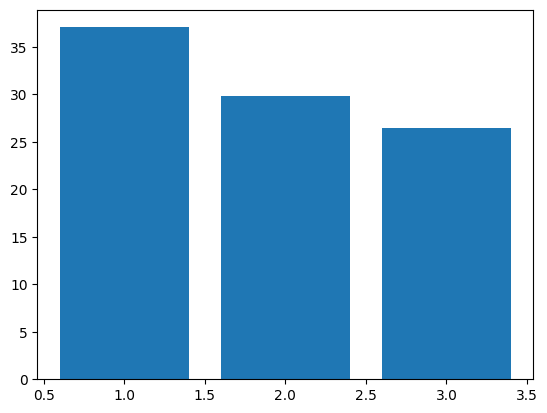

<Axes: xlabel='Pclass', ylabel='Age'>

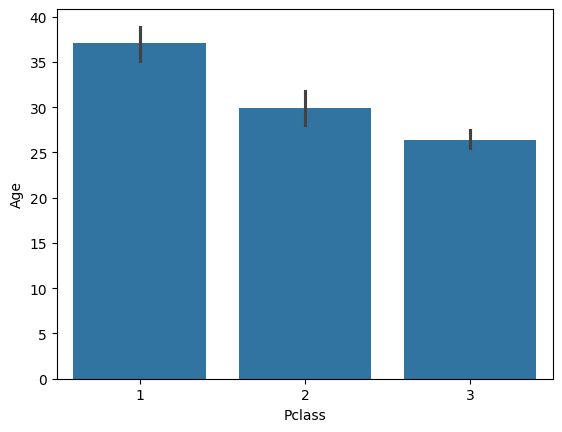

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.bar(x=np.sort(t_df.Pclass.unique()), height=t_df.groupby('Pclass')['Age'].mean())
plt.show()

sns.barplot(x='Pclass', y='Age', data=t_df)

# 길이가 짧을 수록 데이터가 안정적이고, 평균이 믿을 만하다.
# 길이가 길 수록 데이터가 흩어져있고, 평균이 상대적으로 덜 신뢰된다.
# 전체 범위의 10% 이하: 매우 안정적
# 전체 범위의 10~25%: 보통 수준
# 전체 범위의 25% 이상: 데이터 불안정, 표본 부족하거나 데이터간 변동이 큼

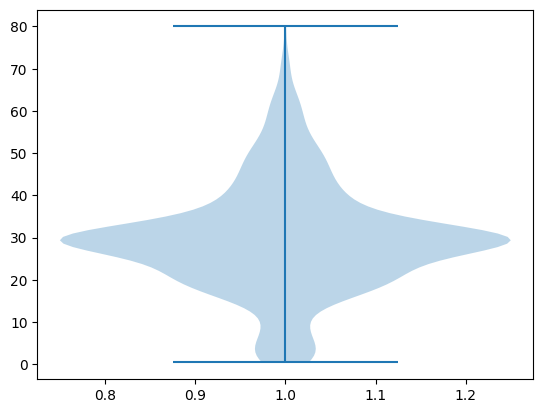

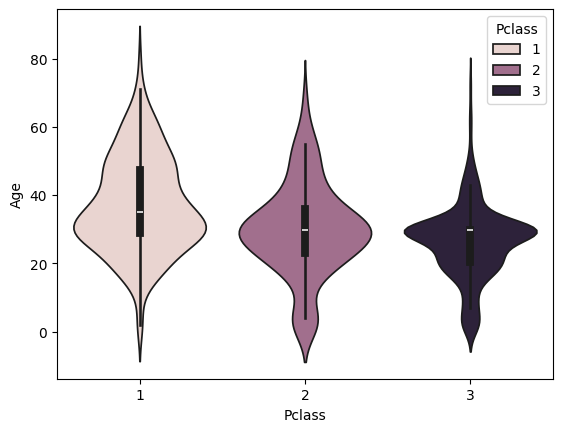

In [13]:
plt.violinplot(t_df.Age)
plt.show()

sns.violinplot(x='Pclass', y='Age', data=t_df, hue='Pclass')
plt.show()

# 중앙값이 위: 데이터가 높은 값 쪽으로 치우쳐져 있음
# 중앙값이 아래: 데이터가 낮은 값 쪽으로 치우쳐져 있음
# 중앙값이 가운데: 정규분포에 가까움

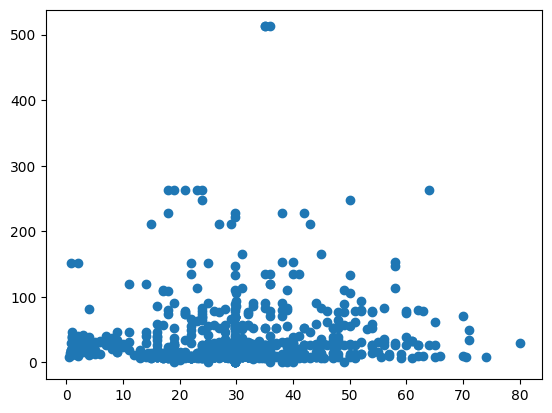

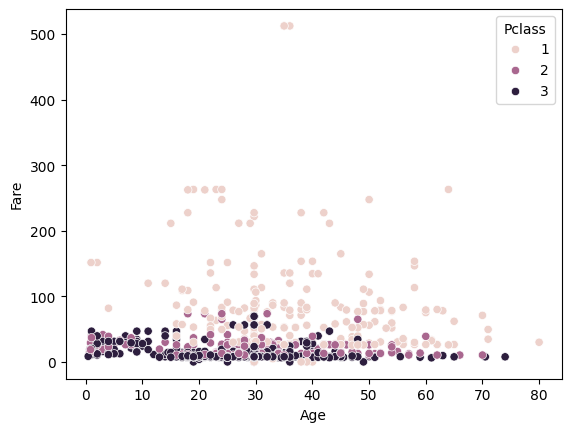

In [14]:
plt.scatter(x=t_df.Age, y=t_df.Fare)
plt.show()

sns.scatterplot(x='Age', y='Fare', data=t_df, hue='Pclass')
plt.show()

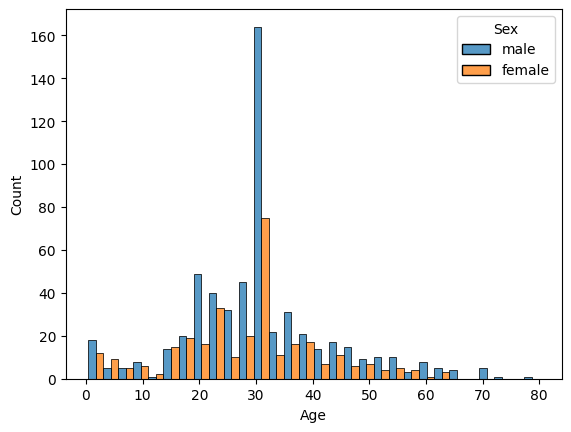

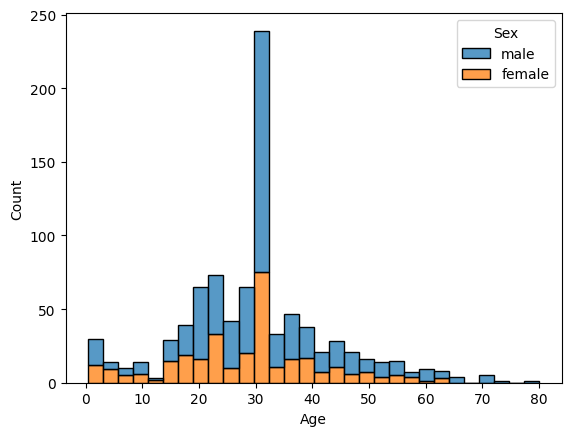

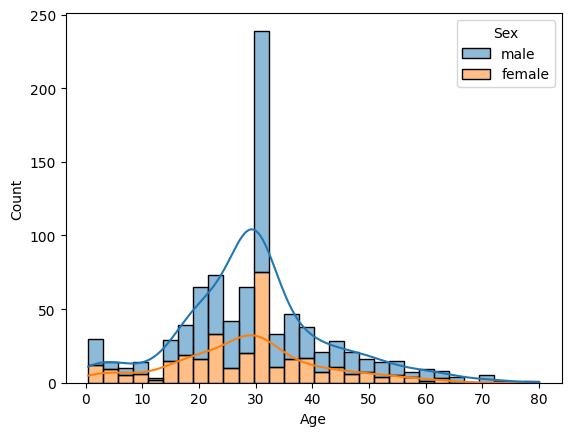

In [15]:
sns.histplot(data=t_df, x='Age', hue='Sex', multiple='dodge')
plt.show()

sns.histplot(data=t_df, x='Age', hue='Sex', multiple='stack')
plt.show()

sns.histplot(data=t_df, x='Age', hue='Sex', multiple='stack', kde=True)
plt.show()

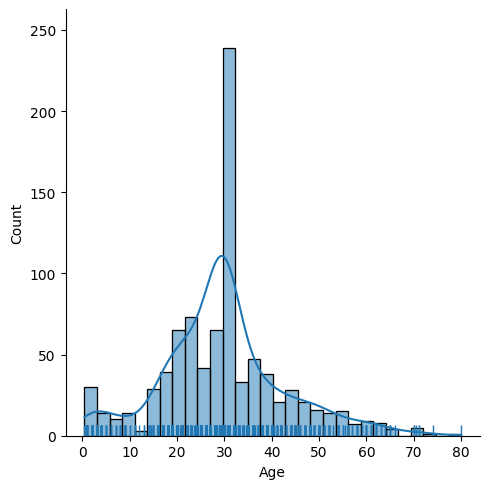

In [16]:
sns.displot(t_df.Age, kde=True, rug=True)
plt.show()

In [17]:
import pandas as pd

a_df = pd.read_csv('./datasets/avocado.csv')
a_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [18]:
a_df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [19]:
a_df.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

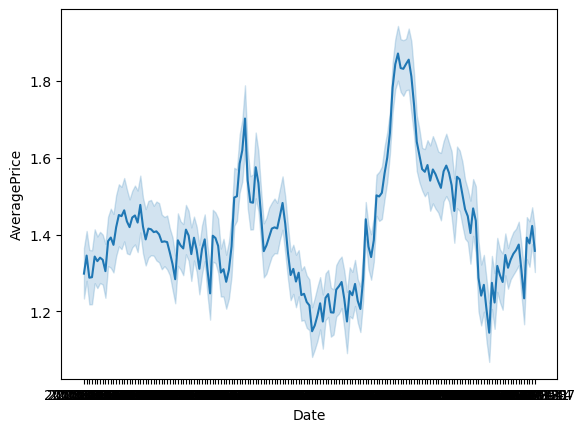

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lineplot(data=a_df, x='Date', y='AveragePrice')
plt.show()

/var/folders/rs/pmsg7qg54zqbpwk2zvchs6br0000gn/T/ipykernel_63512/916051167.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  line.set_xticklabels(line.get_xticklabels(), rotation=90)


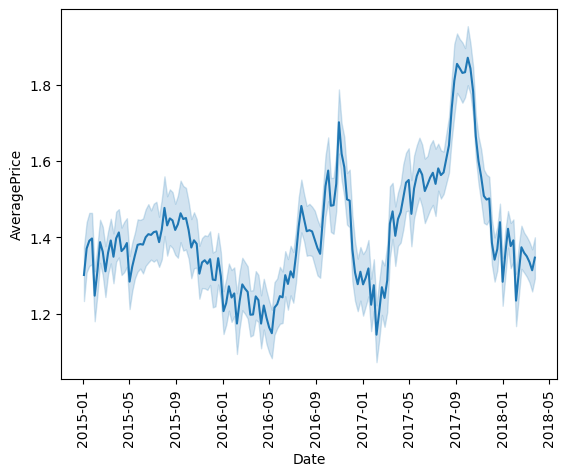

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

a_df.loc[:, 'Date'] = pd.to_datetime(a_df.Date)

line = sns.lineplot(data=a_df, x='Date', y='AveragePrice')
line.set_xticklabels(line.get_xticklabels(), rotation=90)
plt.show()

/var/folders/rs/pmsg7qg54zqbpwk2zvchs6br0000gn/T/ipykernel_63512/1654305962.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  line.set_xticklabels(line.get_xticklabels(), rotation=90)


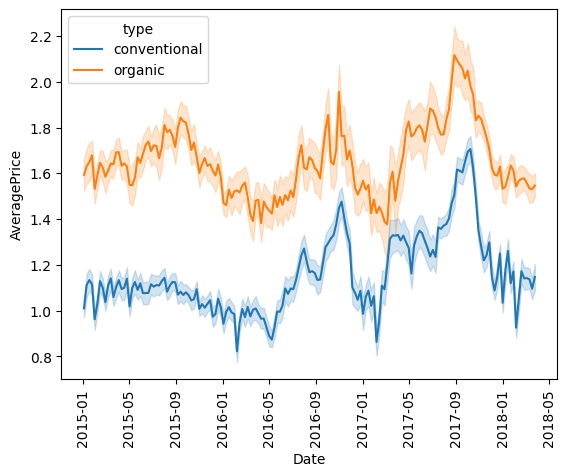

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

line = sns.lineplot(data=a_df, x='Date', y='AveragePrice', hue='type')
line.set_xticklabels(line.get_xticklabels(), rotation=90)
plt.show()